In [129]:
import pandas as pd
import numpy as np

In [130]:
df = pd.read_csv("diabetic_data.csv",header=None)
df.columns = ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamid', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'
]
df.drop(index=df.index[0], axis=0, inplace=True)

data = df.copy()
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")
print(data.describe())
print(data.head())
print(data.dtypes.value_counts())

C:\Users\demiz\AppData\Local\Temp\ipykernel_13492\3065116560.py:1: DtypeWarning: Columns (0,1,6,7,8,9,12,13,14,15,16,17,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("diabetic_data.csv",header=None)


The dataset has 101766 rows and 50 columns
       encounter_id  patient_nbr       race  gender      age  weight  \
count        101766       101766     101766  101766   101766  101766   
unique       101766        73399          6       3       10      10   
top         2278392     88785891  Caucasian  Female  [70-80)       ?   
freq              1           40      76099   54708    26068   98569   

        admission_type_id  discharge_disposition_id  admission_source_id  \
count              101766                    101766               101766   
unique                 15                        44                   27   
top                     1                         1                    7   
freq                45934                     51546                49209   

        time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
count             101766  ...      101766  101766               101766   
unique                28  ...           1       4                  

In [131]:
data['weight'] = pd.to_numeric(data['weight'],errors='coerce') # weight in pounds
data['time_in_hospital'] = pd.to_numeric(data['time_in_hospital'],errors='coerce') # number of days between admission and discharge
data['num_lab_procedures'] = pd.to_numeric(data['num_lab_procedures'],errors='coerce') # number of lab test during the encounter
data['num_procedures'] = pd.to_numeric(data['num_procedures'],errors='coerce') # number of procedures other than lab test, during the encounter
data['num_medications'] = pd.to_numeric(data['num_medications'],errors='coerce') # number of distinct generic names administered during the encounter
data['number_outpatient'] = pd.to_numeric(data['number_outpatient'],errors='coerce') # number of outpatient visits in the year preceding the encounter
data['number_emergency'] = pd.to_numeric(data['number_emergency'],errors='coerce') # number of emergency visits in the year preceding the encounter
data['number_inpatient'] = pd.to_numeric(data['number_inpatient'],errors='coerce') # number of inpatient visits in the year preceding the encounter
data['number_diagnoses'] = pd.to_numeric(data['number_diagnoses'],errors='coerce') # number of diagnoses entered to the system 

In [132]:
print(data.dtypes.value_counts())

object     41
int64       8
float64     1
Name: count, dtype: int64


In [133]:
numeric_attributes = data.columns[data.dtypes!="object"]
categorical_attributes =data.columns[data.dtypes=="object"]
print(numeric_attributes)
print(categorical_attributes)

Index(['weight', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')
Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamid', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


# Handling Missing Values

## Approach C - Replacing missing values with a user defined constant

In [134]:
print('Before replacing missing values:')
data.head(20)

Before replacing missing values:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
2,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
4,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
5,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
7,55842,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
8,63768,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
9,12522,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
10,15738,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Replacing missing values with a user defined constant

In [135]:
data_1 = data.copy()
data_1 = data_1.fillna("?")
data_1 = data_1.replace("?", pd.NA)

### Changing current values with a user defined constant

In [136]:
data_1["admission_type_id"] = pd.to_numeric(data_1["admission_type_id"]) # this is the only place I changed original clean data(Amy)

data_1["admission_type_id"] = data_1["admission_type_id"].replace(1, "Emergency")
data_1["admission_type_id"] = data_1["admission_type_id"].replace(2, "Urgent")
data_1["admission_type_id"] = data_1["admission_type_id"].replace(3, "Elective")
data_1["admission_type_id"] = data_1["admission_type_id"].replace(4, "Newborn")
data_1["admission_type_id"] = data_1["admission_type_id"].replace(5, "Trauma Center")
data_1["admission_type_id"] = data_1["admission_type_id"].replace(6, "Transfer")
data_1["admission_type_id"] = data_1["admission_type_id"].replace(7, "Hospice")
data_1["admission_type_id"] = data_1["admission_type_id"].replace(8, "Unknown")

data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("1", "Home")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("2", "Short Term Hospital")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("3", "SNF")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("4", "ICF")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("5", "Inpatient Care")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("6", "Home w/ Home Health Service")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("7", "Left Against Medical Advice")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("8", "Home Under Care")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("9", "Admitted as an inpatient")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("10", "Nenonate Discharge/Neonatal Aftercare")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("11", "Expired")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("12", "Expected Return for Outpatient Services")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("13", "Hospice/Home")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("14", "Hospice/Medical Facility")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("15", "Medicare-approved Swing Bed")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("16", "Transferred for Outpatient Services")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("17", "Referred for Outpatient Services")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("18", "NULL")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("19", "Expired at Home")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("20", "Expired at Medical facility")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("21", "Expired, Place Unknown")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("22", "Rehabilitation Facility")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("23", "Long Term Care")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("24", "Nursing Facility-Medicaid Certified")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("25", "Not Mapped")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("26", "Unknown/Invalid")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("27", "Federal Health Facility")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("28", "Psychiatric Hospital/Unit")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("29", "Critical Access Hospital")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("30", "Health Care Facility not Defined Elsewhere")

data_1["A1Cresult"] = data_1["A1Cresult"].replace(">7", "Moderate Risk")
data_1["A1Cresult"] = data_1["A1Cresult"].replace(">8", "High Risk")


print('\After replacing missing values:')
data_1.head(50)

\After replacing missing values:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2278392,8222157,Caucasian,Female,[0-10),<NA>,Transfer,Not Mapped,1,1,...,No,No,No,No,No,No,No,No,No,NO
2,149190,55629189,Caucasian,Female,[10-20),<NA>,Emergency,Home,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,64410,86047875,AfricanAmerican,Female,[20-30),<NA>,Emergency,Home,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
4,500364,82442376,Caucasian,Male,[30-40),<NA>,Emergency,Home,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
5,16680,42519267,Caucasian,Male,[40-50),<NA>,Emergency,Home,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,35754,82637451,Caucasian,Male,[50-60),<NA>,Urgent,Home,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
7,55842,84259809,Caucasian,Male,[60-70),<NA>,Elective,Home,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
8,63768,114882984,Caucasian,Male,[70-80),<NA>,Emergency,Home,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
9,12522,48330783,Caucasian,Female,[80-90),<NA>,Urgent,Home,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
10,15738,63555939,Caucasian,Female,[90-100),<NA>,Elective,SNF,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Approach A - Removal of rows containing missing values

In [137]:
print(f"There are {data_1.isnull().sum().sum()} missing values in this dataset")

print('Number of instances = %d'%(data_1.shape[0]))
print('Number of attributes = %d'%(data_1.shape[1]))

print('Number of missing values:')
for col in data_1.columns:
    print('\t%s:%d'%(col,data_1[col].isna().sum()))

data_1.head(20)

There are 377214 missing values in this dataset
Number of instances = 101766
Number of attributes = 50
Number of missing values:
	encounter_id:0
	patient_nbr:0
	race:2273
	gender:0
	age:0
	weight:101766
	admission_type_id:0
	discharge_disposition_id:0
	admission_source_id:0
	time_in_hospital:0
	payer_code:40256
	medical_specialty:49949
	num_lab_procedures:0
	num_procedures:0
	num_medications:0
	number_outpatient:0
	number_emergency:0
	number_inpatient:0
	diag_1:21
	diag_2:358
	diag_3:1423
	number_diagnoses:0
	max_glu_serum:96420
	A1Cresult:84748
	metformin:0
	repaglinide:0
	nateglinide:0
	chlorpropamide:0
	glimepiride:0
	acetohexamide:0
	glipizide:0
	glyburide:0
	tolbutamide:0
	pioglitazone:0
	rosiglitazone:0
	acarbose:0
	miglitol:0
	troglitazone:0
	tolazamid:0
	examide:0
	citoglipton:0
	insulin:0
	glyburide-metformin:0
	glipizide-metformin:0
	glimepiride-pioglitazone:0
	metformin-rosiglitazone:0
	metformin-pioglitazone:0
	change:0
	diabetesMed:0
	readmitted:0


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2278392,8222157,Caucasian,Female,[0-10),<NA>,Transfer,Not Mapped,1,1,...,No,No,No,No,No,No,No,No,No,NO
2,149190,55629189,Caucasian,Female,[10-20),<NA>,Emergency,Home,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,64410,86047875,AfricanAmerican,Female,[20-30),<NA>,Emergency,Home,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
4,500364,82442376,Caucasian,Male,[30-40),<NA>,Emergency,Home,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
5,16680,42519267,Caucasian,Male,[40-50),<NA>,Emergency,Home,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,35754,82637451,Caucasian,Male,[50-60),<NA>,Urgent,Home,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
7,55842,84259809,Caucasian,Male,[60-70),<NA>,Elective,Home,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
8,63768,114882984,Caucasian,Male,[70-80),<NA>,Emergency,Home,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
9,12522,48330783,Caucasian,Female,[80-90),<NA>,Urgent,Home,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
10,15738,63555939,Caucasian,Female,[90-100),<NA>,Elective,SNF,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [138]:
data_1 = data_1.dropna(subset=["race", "diag_1", "diag_2", "diag_3"])

In [139]:
print(f"There are {data_1.isnull().sum().sum()} missing values in this dataset")

print('Number of instances = %d'%(data_1.shape[0]))
print('Number of attributes = %d'%(data_1.shape[1]))

print('Number of missing values:')
for col in data_1.columns:
    print('\t%s:%d'%(col,data_1[col].isna().sum()))
    
print(data_1.describe())
print(data_1.head())

There are 360000 missing values in this dataset
Number of instances = 98053
Number of attributes = 50
Number of missing values:
	encounter_id:0
	patient_nbr:0
	race:0
	gender:0
	age:0
	weight:98053
	admission_type_id:0
	discharge_disposition_id:0
	admission_source_id:0
	time_in_hospital:0
	payer_code:38924
	medical_specialty:48318
	num_lab_procedures:0
	num_procedures:0
	num_medications:0
	number_outpatient:0
	number_emergency:0
	number_inpatient:0
	diag_1:0
	diag_2:0
	diag_3:0
	number_diagnoses:0
	max_glu_serum:92845
	A1Cresult:81860
	metformin:0
	repaglinide:0
	nateglinide:0
	chlorpropamide:0
	glimepiride:0
	acetohexamide:0
	glipizide:0
	glyburide:0
	tolbutamide:0
	pioglitazone:0
	rosiglitazone:0
	acarbose:0
	miglitol:0
	troglitazone:0
	tolazamid:0
	examide:0
	citoglipton:0
	insulin:0
	glyburide-metformin:0
	glipizide-metformin:0
	glimepiride-pioglitazone:0
	metformin-rosiglitazone:0
	metformin-pioglitazone:0
	change:0
	diabetesMed:0
	readmitted:0
       time_in_hospital  num_lab_pro

## Approach D - Removal of attributes containing missing values

In [140]:
print('Number of missing values:')
for col in data_1.columns:
    print('\t%s:%d'%(col,data_1[col].isna().sum()))

Number of missing values:
	encounter_id:0
	patient_nbr:0
	race:0
	gender:0
	age:0
	weight:98053
	admission_type_id:0
	discharge_disposition_id:0
	admission_source_id:0
	time_in_hospital:0
	payer_code:38924
	medical_specialty:48318
	num_lab_procedures:0
	num_procedures:0
	num_medications:0
	number_outpatient:0
	number_emergency:0
	number_inpatient:0
	diag_1:0
	diag_2:0
	diag_3:0
	number_diagnoses:0
	max_glu_serum:92845
	A1Cresult:81860
	metformin:0
	repaglinide:0
	nateglinide:0
	chlorpropamide:0
	glimepiride:0
	acetohexamide:0
	glipizide:0
	glyburide:0
	tolbutamide:0
	pioglitazone:0
	rosiglitazone:0
	acarbose:0
	miglitol:0
	troglitazone:0
	tolazamid:0
	examide:0
	citoglipton:0
	insulin:0
	glyburide-metformin:0
	glipizide-metformin:0
	glimepiride-pioglitazone:0
	metformin-rosiglitazone:0
	metformin-pioglitazone:0
	change:0
	diabetesMed:0
	readmitted:0


In [141]:
data_1.drop('weight', axis=1, inplace=True) # 98053 records with missing values, deemed unusable
data_1.drop('payer_code', axis=1, inplace=True) # 38924 records with missing values, deemed unusable
data_1.drop('medical_specialty', axis=1, inplace=True) # 48318 records with missing values, deemed un

In [142]:
print('Number of missing values after removal:')
for col in data_1.columns:
    print('\t%s:%d'%(col,data_1[col].isna().sum()))
    
data_1.head(20)

Number of missing values after removal:
	encounter_id:0
	patient_nbr:0
	race:0
	gender:0
	age:0
	admission_type_id:0
	discharge_disposition_id:0
	admission_source_id:0
	time_in_hospital:0
	num_lab_procedures:0
	num_procedures:0
	num_medications:0
	number_outpatient:0
	number_emergency:0
	number_inpatient:0
	diag_1:0
	diag_2:0
	diag_3:0
	number_diagnoses:0
	max_glu_serum:92845
	A1Cresult:81860
	metformin:0
	repaglinide:0
	nateglinide:0
	chlorpropamide:0
	glimepiride:0
	acetohexamide:0
	glipizide:0
	glyburide:0
	tolbutamide:0
	pioglitazone:0
	rosiglitazone:0
	acarbose:0
	miglitol:0
	troglitazone:0
	tolazamid:0
	examide:0
	citoglipton:0
	insulin:0
	glyburide-metformin:0
	glipizide-metformin:0
	glimepiride-pioglitazone:0
	metformin-rosiglitazone:0
	metformin-pioglitazone:0
	change:0
	diabetesMed:0
	readmitted:0


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
2,149190,55629189,Caucasian,Female,[10-20),Emergency,Home,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Home,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
4,500364,82442376,Caucasian,Male,[30-40),Emergency,Home,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
5,16680,42519267,Caucasian,Male,[40-50),Emergency,Home,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,35754,82637451,Caucasian,Male,[50-60),Urgent,Home,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30
7,55842,84259809,Caucasian,Male,[60-70),Elective,Home,2,4,70,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
8,63768,114882984,Caucasian,Male,[70-80),Emergency,Home,7,5,73,...,No,No,No,No,No,No,No,No,Yes,>30
9,12522,48330783,Caucasian,Female,[80-90),Urgent,Home,4,13,68,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
10,15738,63555939,Caucasian,Female,[90-100),Elective,SNF,4,12,33,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
11,28236,89869032,AfricanAmerican,Female,[40-50),Emergency,Home,7,9,47,...,No,Steady,No,No,No,No,No,No,Yes,>30


# Clustering

### set up the clustering data

In [143]:
#using our team's processed dataset (data_1) for clustering analysis
cluster_data = data_1.copy()

# get the number of instances and attributes in the dataset
instance_count, feature_count = cluster_data.shape
print(f'Number of instances: {instance_count}, Number of attributes: {feature_count}')


Number of instances: 98053, Number of attributes: 47


## Method 1： K-Means 

### choosing medication-related columns from the clustering data

In [144]:

print(cluster_data.columns)

medica_data=cluster_data[["metformin","repaglinide","nateglinide","chlorpropamide","glimepiride","acetohexamide","glipizide","glyburide","pioglitazone","rosiglitazone","acarbose","miglitol","troglitazone","examide","citoglipton","insulin","glyburide-metformin","glimepiride-pioglitazone","metformin-rosiglitazone","metformin-pioglitazone","tolbutamide"]]
medica_data

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamid', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,pioglitazone,rosiglitazone,...,miglitol,troglitazone,examide,citoglipton,insulin,glyburide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,tolbutamide
2,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
3,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
5,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No
6,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101762,Steady,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Down,No,No,No,No,No
101763,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No
101764,Steady,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Down,No,No,No,No,No
101765,No,No,No,No,No,No,Steady,No,Steady,No,...,No,No,No,No,Up,No,No,No,No,No


### Converting medication dosage to numerical values: "No" -> 0, "Down" -> 1, "Steady" -> 2, "Up" -> 3

In [145]:
mapping = {"No": 0, "Down": 1, "Steady": 2, "Up": 3}

# Replace medication dosage values in the DataFrame
medica_data.replace(mapping, inplace=True)

# Display the transformed DataFrame
print(medica_data.head(15))


    metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  \
2           0            0            0               0            0   
3           0            0            0               0            0   
4           0            0            0               0            0   
5           0            0            0               0            0   
6           0            0            0               0            0   
7           2            0            0               0            2   
8           0            0            0               0            0   
9           0            0            0               0            0   
10          0            0            0               0            0   
11          0            0            0               0            0   
12          0            0            0               0            0   
13          2            3            0               0            0   
14          0            0            0               0         

C:\Users\demiz\AppData\Local\Temp\ipykernel_13492\2679616772.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medica_data.replace(mapping, inplace=True)


### Applying K-Means clustering with 3 clusters and 50 maximum iterations

In [146]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=3, max_iter=50, random_state=1)
k_means.fit(medica_data.values) 

# Obtaining cluster labels
labels = k_means.labels_

# Renaming 'patient_nbr' to 'patient_ID'
cluster_data.rename(columns={'patient_nbr': 'patient_ID'}, inplace=True)

# Creating DataFrame of cluster labels with patient IDs
pd.DataFrame(labels, cluster_data.patient_ID , columns=['Cluster ID'])


,Cluster ID
patient_ID,
55629189,1
86047875,2
82442376,1
42519267,1
82637451,1
...,...
100162476,2
74694222,1
41088789,2


### Calculating centroids of the clusters and displaying them

In [147]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids, columns=medica_data.columns)

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,pioglitazone,rosiglitazone,...,miglitol,troglitazone,examide,citoglipton,insulin,glyburide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,tolbutamide
0,0.547323,0.024491,0.021171,-1.604619e-17,2.060606,-1.084202e-19,0.036530,0.024699,0.247198,0.210046,...,0.003944,4.151100e-04,0.0,0.0,1.101287,0.005812,-1.084202e-19,0.0,-1.084202e-19,1.246832e-18
1,0.380664,0.030977,0.014440,8.124328e-04,0.002595,5.241502e-05,0.259166,0.190660,0.141704,0.128862,...,0.000472,-3.103529e-18,0.0,0.0,2.271195,0.014912,5.241502e-05,0.0,5.241502e-05,3.669052e-04
2,0.395693,0.032826,0.013454,2.541850e-03,0.001416,1.287490e-18,0.267148,0.242946,0.139983,0.117887,...,0.000635,7.262428e-05,0.0,0.0,0.205309,0.013508,1.287490e-18,0.0,1.287490e-18,5.446821e-04


In [148]:
# Generating descriptive statistics for the dataset
medica_data.describe()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,pioglitazone,rosiglitazone,...,miglitol,troglitazone,examide,citoglipton,insulin,glyburide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,tolbutamide
count,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,...,98053.000000,98053.000000,98053.0,98053.0,98053.000000,98053.000000,98053.000000,98053.0,98053.000000,98053.000000
mean,0.397295,0.031697,0.014217,0.001744,0.103057,0.000020,0.252710,0.211875,0.145921,0.126687,...,0.000734,0.000061,0.0,0.0,1.053267,0.013676,0.000020,0.0,0.000020,0.000449
std,0.813788,0.255353,0.169774,0.060484,0.450839,0.006387,0.677535,0.630538,0.525666,0.491725,...,0.038581,0.011063,0.0,0.0,1.099934,0.165284,0.006387,0.0,0.006387,0.029955
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,2.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,2.000000,0.0,0.0,3.000000,3.000000,2.000000,0.0,2.000000,2.000000


### Generating random test data

In [161]:
possible_values = [0, 1, 2, 3]
num_features = 21
num_samples = 5
test_data = []

# Creating random test instances
for _ in range(num_samples):
    test_instance = np.random.choice(possible_values, size=num_features)
    test_data.append(test_instance.tolist())

# Converting test data to NumPy array
test_data = np.array(test_data)

# Predicting cluster labels for test data
labels = k_means.predict(test_data)
labels = test_labels.reshape(-1,1)

# Assigning patient IDs
patient_ids = np.array(['patient1', 'patient2', 'patient3', 'patient4', 'patient5']).reshape(-1,1)

# Inserting patient ID and cluster ID into columns
cols = medica_data.columns.tolist()
cols.insert(0, "patient_ID")
cols.append('Cluster ID')

# Displaying test data
print(test_data)

[[0 1 3 3 0 1 0 0 1 1 3 0 0 2 2 1 1 0 3 3 0]
 [2 3 2 3 3 0 2 3 3 1 2 0 1 1 2 1 1 3 0 0 2]
 [3 0 0 3 2 1 3 3 1 3 0 1 3 2 3 3 1 3 3 3 3]
 [1 3 1 3 2 2 1 3 1 3 1 0 3 2 3 0 2 0 3 3 0]
 [3 0 3 2 0 2 1 1 2 3 3 3 3 2 0 0 2 0 3 1 3]]


C:\Users\demiz\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


### Displaying test data's cluster category result

In [177]:
result = pd.DataFrame(np.concatenate((patient_ids, test_data, test_labels), axis=1), columns=cols)
result

,patient_ID,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,pioglitazone,...,troglitazone,examide,citoglipton,insulin,glyburide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,tolbutamide,Cluster ID
0,patient1,0,1,3,3,0,1,0,0,1,...,0,2,2,1,1,0,3,3,0,2
1,patient2,2,3,2,3,3,0,2,3,3,...,1,1,2,1,1,3,0,0,2,0
2,patient3,3,0,0,3,2,1,3,3,1,...,3,2,3,3,1,3,3,3,3,0
3,patient4,1,3,1,3,2,2,1,3,1,...,3,2,3,0,2,0,3,3,0,0
4,patient5,3,0,3,2,0,2,1,1,2,...,3,2,0,0,2,0,3,1,3,0


### Calculating SSE to determine the optimal K value

Text(0, 0.5, 'SSE')

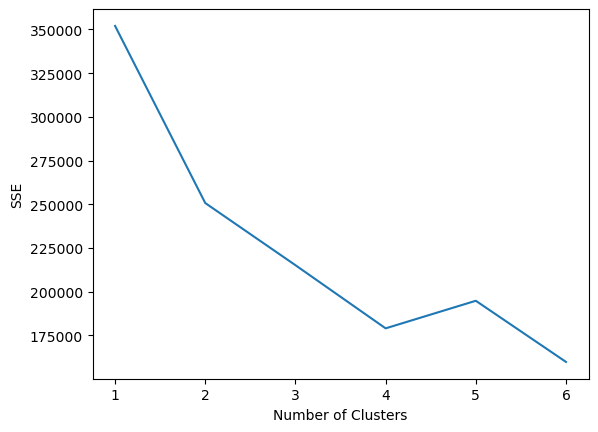

In [178]:
import matplotlib.pyplot as plt
%matplotlib inline

# Calculating SSE for each cluster number using KMeans clustering for medica_data

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(medica_data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

### Displaying medical data before dimensionality reduction

In [179]:
medica_data

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,pioglitazone,rosiglitazone,...,miglitol,troglitazone,examide,citoglipton,insulin,glyburide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,tolbutamide
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
3,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
5,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,2,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101762,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
101763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
101764,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
101765,0,0,0,0,0,0,2,0,2,0,...,0,0,0,0,3,0,0,0,0,0


### Dimensionality reduction: applying Principal Component Analysis (PCA) with 2 components

In [173]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(medica_data)

pca = PCA(n_components=2)
pca.fit(scaled_data)

# Extracting principal components and transforming the scaled data
principal_components = pca.components_
medicaPCA_result_data = pca.transform(scaled_data)


print("Principal Components:")
print(principal_components)
print("\n medica PCA2_result_data Data:")
print(medicaPCA_result_data)


Principal Components:
[[-0.65155485  0.04258325 -0.07337716  0.06032067 -0.0269263   0.01528174
  -0.14391879 -0.53497861 -0.15576467 -0.36918183 -0.13443472 -0.0765101
   0.00791479 -0.         -0.          0.2267673   0.1201955   0.05012533
  -0.          0.02190176  0.05794202]
 [ 0.14887492  0.19703955  0.1538602  -0.11060849  0.37517111 -0.02906691
   0.45091932 -0.50515671  0.34315813  0.13283906  0.22694661  0.12976178
   0.0524057   0.          0.          0.29330942 -0.08873442  0.014619
   0.          0.01656168 -0.04592947]]

 medica PCA2_result_data Data:
[[ 1.09423461  0.19137718]
 [ 0.05090543  0.7224564 ]
 [ 1.09423461  0.19137718]
 ...
 [-0.91939409  0.02393621]
 [ 0.07676091  2.82806317]
 [ 0.47573834 -0.60860934]]


### Displaying a scatter plot of the medicaPCA_result_data

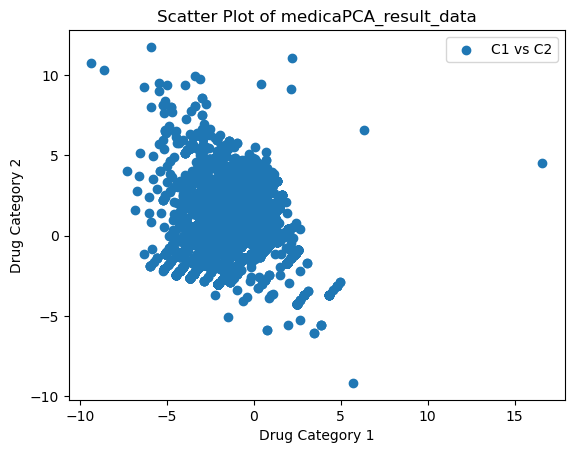

In [181]:
plt.scatter(medicaPCA_result_data[:, 0], medicaPCA_result_data[:, 1], label='C1 vs C2')
plt.xlabel('Drug Category 1')
plt.ylabel('Drug Category 2')
plt.title('Scatter Plot of medicaPCA_result_data')
plt.legend()
plt.show()

### Calculating SSE for optimal K value after PCA

Text(0, 0.5, 'SSE')

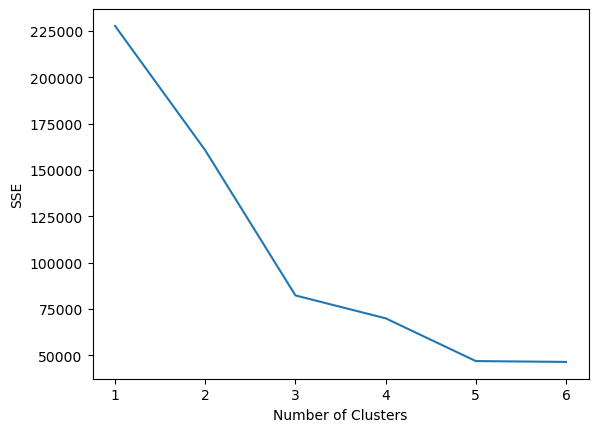

In [182]:
numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(medicaPCA_result_data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

## Silhouette analysis for KMeans clustering

In [183]:
silhouette_data=medicaPCA_result_data.copy()
silhouette_data

array([[ 1.09423461,  0.19137718],
       [ 0.05090543,  0.7224564 ],
       [ 1.09423461,  0.19137718],
       ...,
       [-0.91939409,  0.02393621],
       [ 0.07676091,  2.82806317],
       [ 0.47573834, -0.60860934]])

C:\Users\demiz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\demiz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.5267428139492096
For n_clusters = 3 The average silhouette_score is : 0.6372420537820951


C:\Users\demiz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\demiz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.6310440024268921
For n_clusters = 5 The average silhouette_score is : 0.629922549940258


C:\Users\demiz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.642459526887581


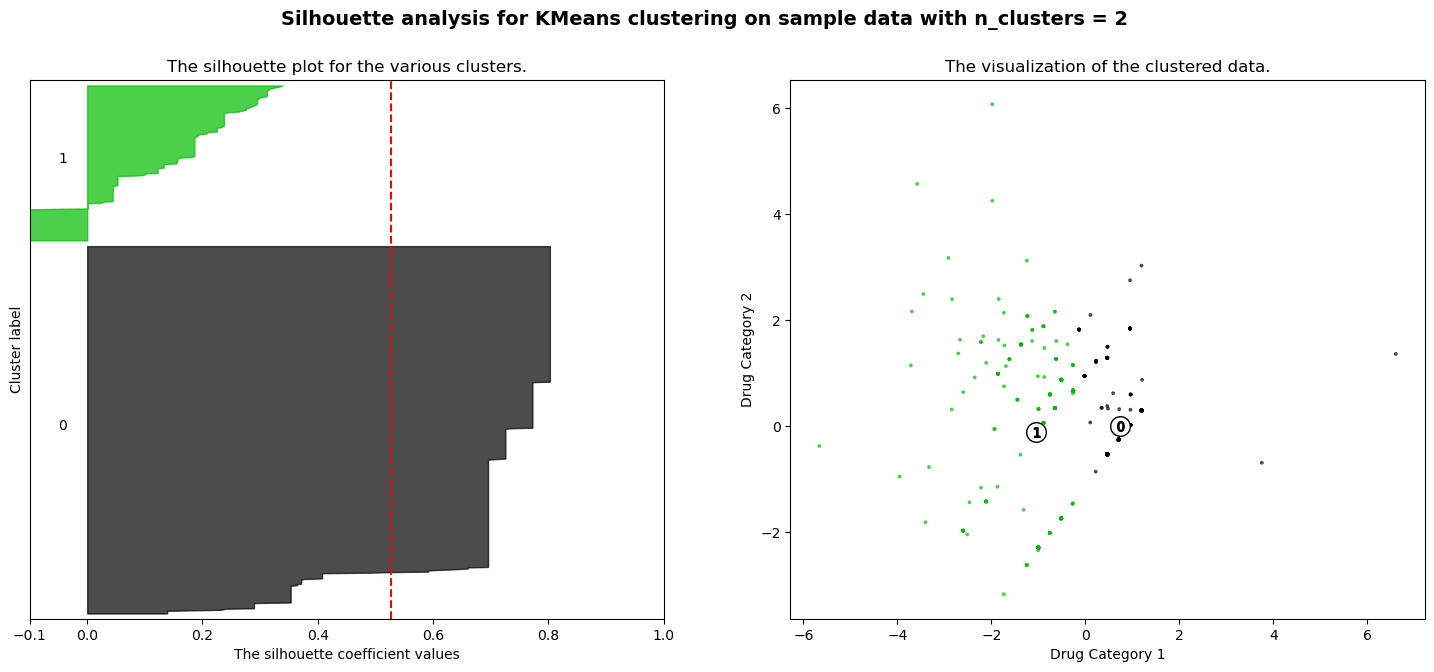

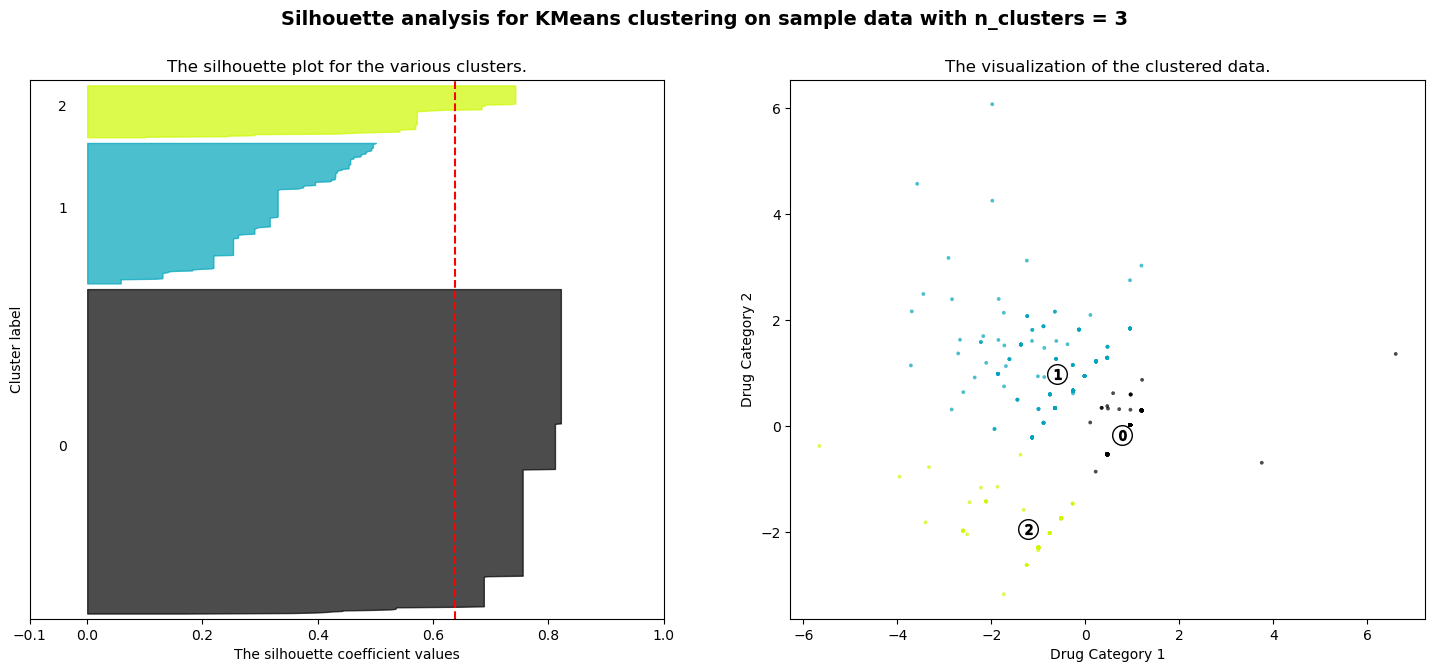

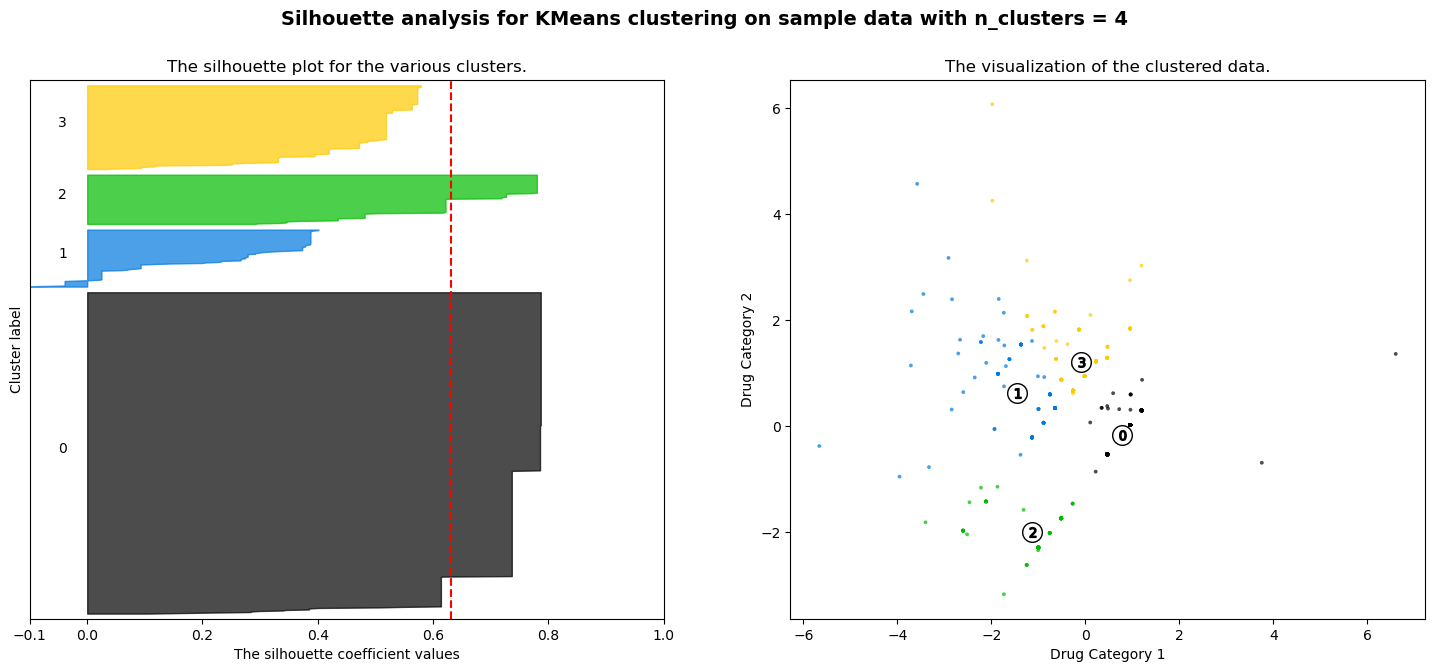

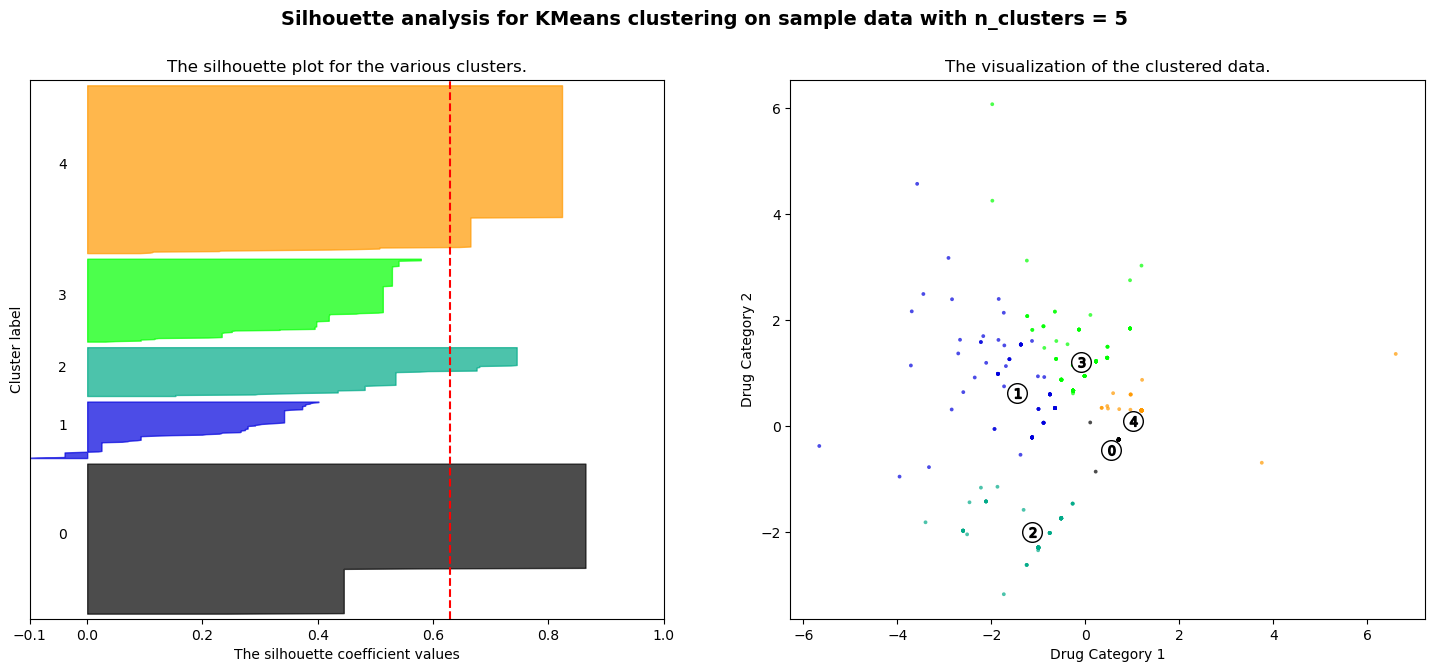

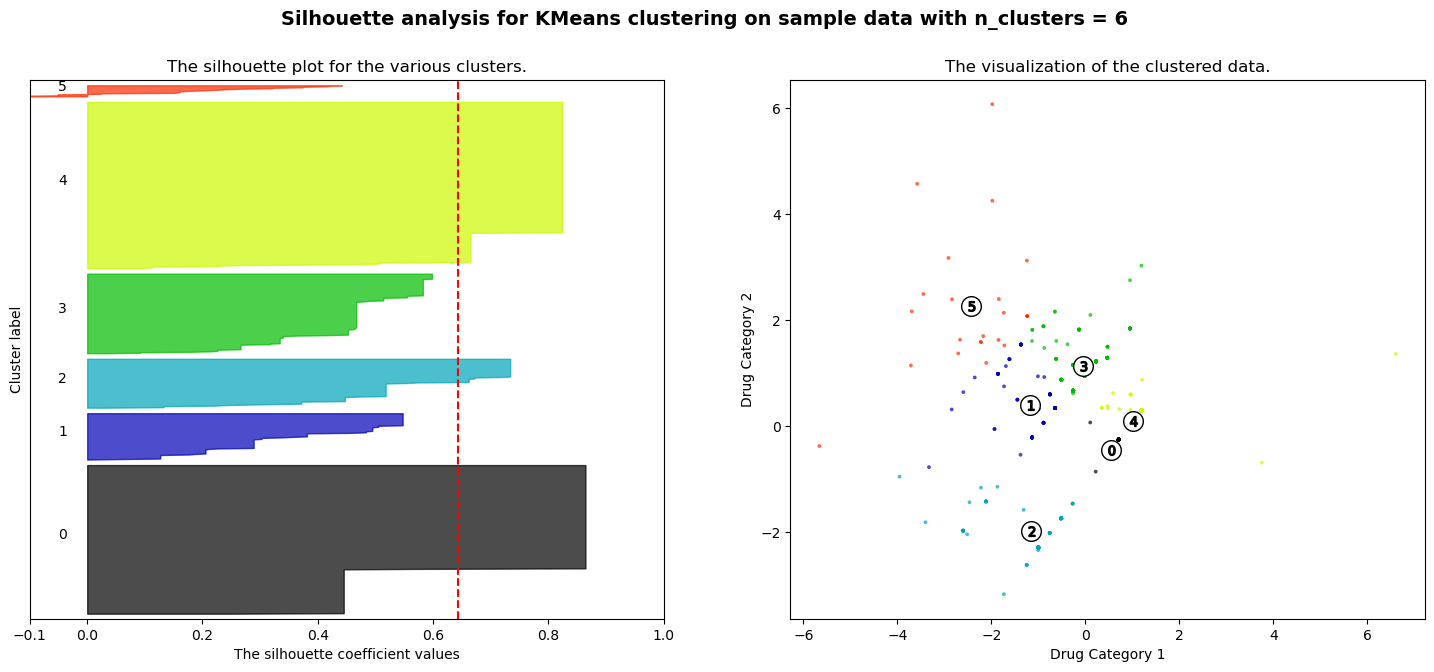

In [157]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.cm as cm


#random_indices = np.random.choice(len(data), size=1000, replace=False)
X = silhouette_data[:1000]

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Drug Category 1")
    ax2.set_ylabel("Drug Category 2")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


### KMeans clustering on silhouette_data and displaying results


In [158]:
k_means = KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(silhouette_data[0:1000]) 
labels = k_means.labels_

data_choice_df = pd.DataFrame(silhouette_data[0:1000], columns=['Drug Category 1', 'Drug Category 2'])  
data_choice_df['Cluster ID'] = labels

print(data_choice_df.head(20))


    Drug Category 1  Drug Category 2  Cluster ID
0          1.195329         0.297283           0
1         -0.261630         0.667337           1
2          1.195329         0.297283           0
3          0.225357         1.219973           1
4          0.951836         0.020965           0
5         -0.650077         2.158301           1
6         -1.003033        -2.291287           0
7          0.225357         1.219973           1
8         -0.512345         0.874816           1
9          0.951836         0.020965           0
10        -1.249987        -2.618459           0
11        -0.876598         0.924605           1
12         0.951836         0.020965           0
13         0.951836         0.020965           0
14         1.195329         0.297283           0
15         0.225357         1.219973           1
16        -1.003033        -2.291287           0
17         0.951836         0.020965           0
18         0.464848        -0.531671           0
19         0.464848 

C:\Users\demiz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


## DBSC

### Prepare data for DBSCAN clustering

In [184]:
DBSC_data=PCA_result_data.copy()
data=DBSC_data.copy()

In [185]:
from sklearn.cluster import DBSCAN
# 
selected_data=data[:20000]

# Convert 'data' to a DataFrame
data_df = pd.DataFrame(selected_data, columns=['Drug Category 1', 'Drug Category 2'])

### Perform DBSCAN clustering with different values

### value 1 (eps=3, min_samples=80)

<Axes: xlabel='Drug Category 1', ylabel='Drug Category 2'>

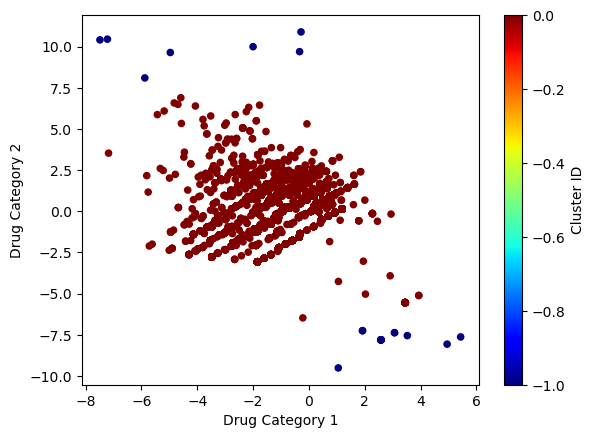

In [120]:
db = DBSCAN(eps=3, min_samples=80).fit(selected_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_, columns=['Cluster ID'])

# Concatenate data_df and labels
result = pd.concat([data_df, labels], axis=1)

# Plot the scatter plot
result.plot.scatter('Drug Category 1', 'Drug Category 2', c='Cluster ID', colormap='jet')


### value 2 (eps=1, min_samples=80)

<Axes: xlabel='Drug Category 1', ylabel='Drug Category 2'>

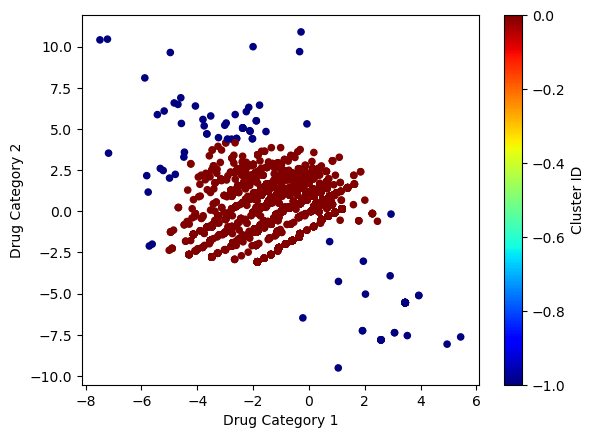

In [121]:

db = DBSCAN(eps=1, min_samples=80).fit(selected_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_, columns=['Cluster ID'])

# Concatenate data_df and labels
result = pd.concat([data_df, labels], axis=1)

# Plot the scatter plot
result.plot.scatter('Drug Category 1', 'Drug Category 2', c='Cluster ID', colormap='jet')

### value 3 (eps=0.5, min_samples=80)

<Axes: xlabel='Drug Category 1', ylabel='Drug Category 2'>

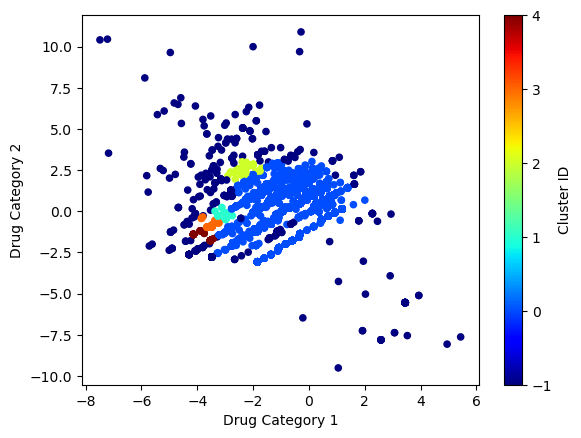

In [122]:
db = DBSCAN(eps=0.5, min_samples=80).fit(selected_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_, columns=['Cluster ID'])

# Concatenate data_df and labels
result = pd.concat([data_df, labels], axis=1)

# Plot the scatter plot
result.plot.scatter('Drug Category 1', 'Drug Category 2', c='Cluster ID', colormap='jet')

In [123]:
# the third method

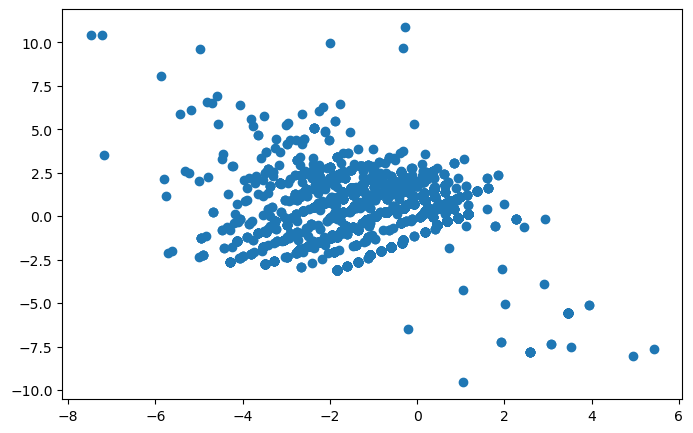

In [124]:
plt.figure(figsize=(8, 5))
plt.subplots_adjust(bottom=0.1)
plt.scatter(data_df.iloc[:,0],data_df.iloc[:,1])

plt.show()

In [125]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, linkage='complete')
cluster_labels = cluster.fit_predict(data_df)

print(cluster_labels)


[0 0 0 ... 0 0 0]


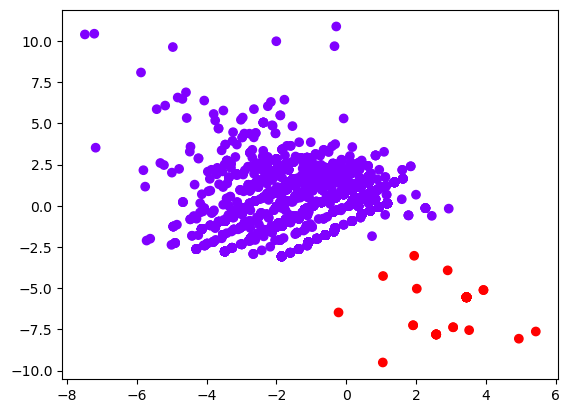

In [126]:
plt.scatter(data_df.iloc[:,0],data_df.iloc[:,1], c=cluster.labels_, cmap='rainbow')